# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset described in the attached paper represents 17 marketing campaigns conducted by a Portuguese bank between May 2008 and November 2010. These correspond to a total of 79,354 contacts. This detail is found in the Materials and Methods section

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



After examining the data description, several features are categorical but initially represented as strings, so they should be explicitly coerced to the 'category' dtype for modeling efficiency and clarity. Additionally, the duration feature should be excluded from modeling to avoid target leakage, as it’s only known after the outcome is determined. Below code performs these transformations, and creates a new dataframe df2, that is used henceforth in this assignment.

In [6]:
import pandas as pd
import numpy as np

# Step 1: Create a copy of the original DataFrame to preserve it
df2 = df.copy()

# Step 2: Convert appropriate columns to 'category' dtype
categorical_cols = [
    'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'month', 'day_of_week', 'poutcome', 'y'
]
df2[categorical_cols] = df2[categorical_cols].astype('category')

# Step 3: Exclude 'duration' from modeling by dropping it
df2 = df2.drop(columns=['duration'])

# df2 is now a clean, transformed version of df ready for analysis or modeling

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  campaign        41188 non-null  int64   
 11  pdays           41188 non-null  int64   
 12  previous        41188 non-null  int64   
 13  poutcome        41188 non-null  category
 14  emp.var.rate    41188 non-null  float64 
 15  cons.price.idx  41188 non-null  float64 
 16  cons.conf.idx   41188 non-null  float64 
 17  euribor3m   

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The business objective is to improve the efficiency of bank direct marketing campaigns by predicting which clients are likely to subscribe to a long-term deposit. By identifying high-potential customers, the bank can reduce contact costs while maintaining or increasing campaign success rates.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

Below code encodes the data, after subsetting to just the bank client information features.

In [8]:
# Encode the data after subsetting to just bank client information features.

# Step 1: Select bank client features and target from the cleaned DataFrame
# These features reflect stable client attributes available before any campaign contact
bank_features = [
    'age', 'job', 'marital', 'education', 'default',
    'housing', 'loan'
]
target_col = 'y'
df_model = df2[bank_features + [target_col]]

# Step 2: Encode categorical variables using one-hot encoding (excluding target)
df_encoded = pd.get_dummies(df_model.drop(columns=[target_col]), drop_first=True)

# Step 3: Encode target variable as binary (yes=1, no=0)
df_encoded[target_col] = df_model[target_col].map({'yes': 1, 'no': 0})

# df_encoded is now ready for modeling
df_encoded.head()

,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,y
0,56,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
1,57,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,0
2,37,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,0
3,40,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
4,56,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [9]:
# Code to perform test/train split
from sklearn.model_selection import train_test_split

# Step 1: Separate features and target
X = df_encoded.drop(columns=['y'])
y = df_encoded['y']

# Step 2: Split into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# X_train, X_test, y_train, y_test are now ready for modeling
print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Training samples: 32950, Test samples: 8238


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

The baseline accuracy reflects the performance of a naive classifier that always predicts the majority class, providing a minimum threshold our model must exceed to be considered effective.

In [10]:
# Compute baseline accuracy by predicting the majority class
baseline_accuracy = y_test.value_counts(normalize=True).max()
print(f"Baseline accuracy (majority class): {baseline_accuracy:.4f}")

Baseline accuracy (majority class): 0.8874


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [11]:
# A simple logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 2: Predict on the test set
y_pred = model.predict(X_test)


### Problem 9: Score the Model

What is the accuracy of your model?

In [12]:
# Score the model, by evaluating the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Test Accuracy: {accuracy:.4f}")

Logistic Regression Test Accuracy: 0.8874


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [13]:
# Code to fit and score 4 models -- logistic regression, KNN, Decision Tree and SVM
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

# Initialize results list
results = []

# Train, predict, and record metrics for each model
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    results.append({
        'Model': name,
        'Train Time': round(train_time, 4),
        'Train Accuracy': round(train_acc, 4),
        'Test Accuracy': round(test_acc, 4)
    })

# Create summary DataFrame
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression      0.2011          0.8873         0.8874
1                  KNN      0.0082          0.8893         0.8765
2        Decision Tree      0.0659          0.9171         0.8631
3                  SVM      7.5602          0.8873         0.8874


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Creating a more advanced logistical regression model using hyper parameter tuning and grid search.  We also chose to exclude gender from our modeling to avoid introducing bias, plus also per the paper it was not not useful as there the rate of success does not vary much by gender. Looking at the model results above, all the different modeling methods are not producing much better models than the baseline majority predictor in terms of accuracy score. This tells us that we likely have a signficant class imbalance problem in the data-- most respondents do not respond, and only a few respond to the marketing survey. Reading through the paper, using an ROC plot as the performance metric, as it plots the true positive rate against the false positive rate, and allows identifying how good the class discrimination is, the higher the better

Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Time: 4.4513 seconds
Train Accuracy: 0.8873
Test Accuracy: 0.8874


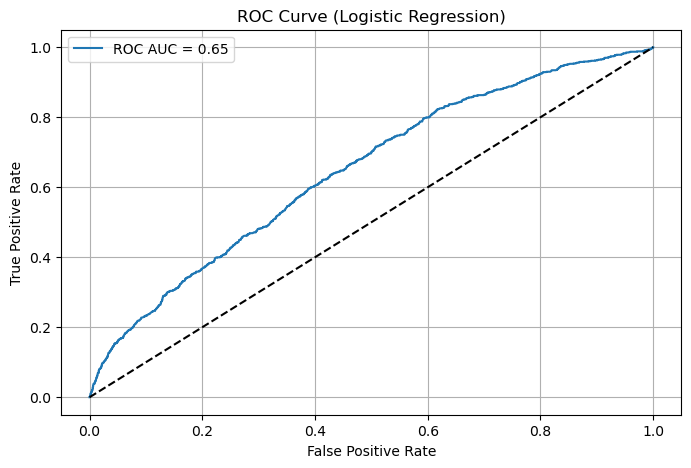

In [14]:
# Code for improved logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

# Step 1: Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Step 2: Run grid search with cross-validation
start_time = time.time()
grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
train_time = time.time() - start_time

# Step 3: Best model from grid search
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Step 4: Evaluate performance
train_acc = accuracy_score(y_train, best_model.predict(X_train))
test_acc = accuracy_score(y_test, best_model.predict(X_test))
print(f"Train Time: {train_time:.4f} seconds")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Step 5: Predict probabilities on test set
y_scores = best_model.predict_proba(X_test)[:, 1]

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_test, y_scores):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend()
plt.grid(True)
plt.show()


Although the new model is better than the baseline majority-class predictor, there is still much to improve on the model. 

Next let us build an improved decision tree model for further optimization, because it is fast to train.

Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}
Train Time: 2.5334 seconds
Train Accuracy: 0.8879
Test Accuracy: 0.8874


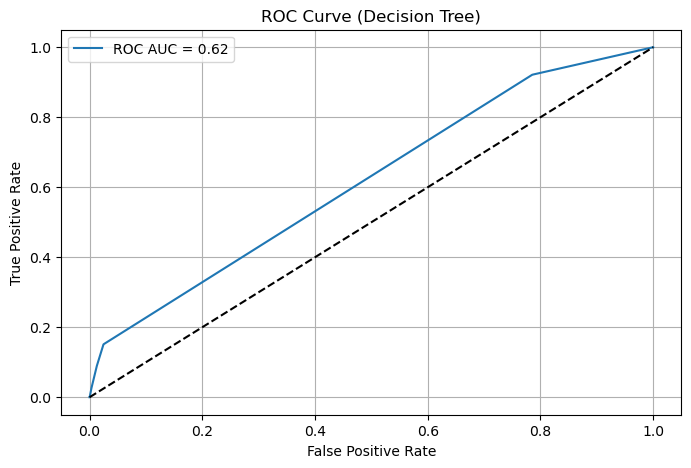

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

# Step 1: Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Step 2: Run grid search with cross-validation
start_time = time.time()
grid_search = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
train_time = time.time() - start_time

# Step 3: Best model from grid search
best_tree = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Step 4: Evaluate performance
train_acc = accuracy_score(y_train, best_tree.predict(X_train))
test_acc = accuracy_score(y_test, best_tree.predict(X_test))
print(f"Train Time: {train_time:.4f} seconds")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Step 5: Predict probabilities on test set
y_scores = best_tree.predict_proba(X_test)[:, 1]

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_test, y_scores):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree)')
plt.legend()
plt.grid(True)
plt.show()



The decision tree was fast to train, but yielded inferior results to the logistic regression. The AOC is lesser and its class discrimination also appears to be poorer.

Next let us try a KNN

c:\Users\murli\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.8630956         nan 0.87660091 0.86907436
        nan 0.86789074 0.88236722 0.87335357 0.88163885 0.87289833
 0.88376328 0.8739909  0.88379363 0.87411229]
  warnings.warn(


Best parameters: {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Train Time: 79.7685 seconds
Train Accuracy: 0.8886
Test Accuracy: 0.8827


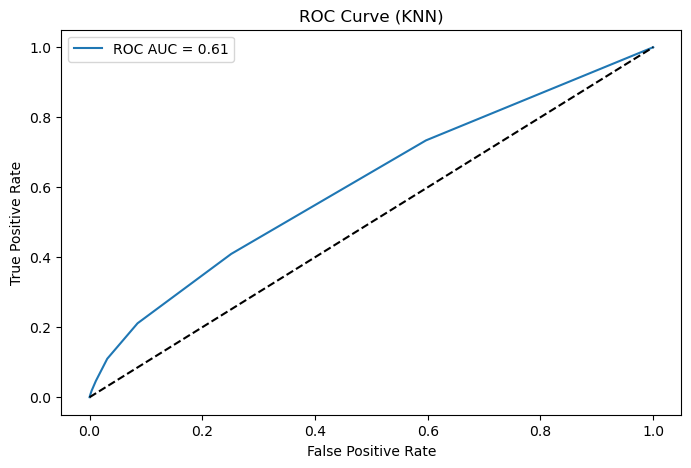

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

# Step 1: Define parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan, 2: Euclidean
}

# Step 2: Run grid search with cross-validation
start_time = time.time()
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
train_time = time.time() - start_time

# Step 3: Best model from grid search
best_knn = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Step 4: Evaluate performance
train_acc = accuracy_score(y_train, best_knn.predict(X_train))
test_acc = accuracy_score(y_test, best_knn.predict(X_test))
print(f"Train Time: {train_time:.4f} seconds")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Step 5: Predict probabilities on test set
y_scores = best_knn.predict_proba(X_test)[:, 1]

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_test, y_scores):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (KNN)')
plt.legend()

The KNN model had similar model scoring compared to the decision tree model, but came at a signficantly higher computational expense

### SVM Exploration

To assess whether a non-linear decision boundary improves performance, train an RBF-kernel SVM with scaled features and grid search over `C` and `gamma`. While computationally intensive, SVM may uncover subtle patterns missed by simpler models like Logistic Regression or Decision Trees. Due to computational limitations performing a lean SVM with just 3 fold.


Best parameters: {'C': 0.1, 'gamma': 'scale'}
Train Time: 452.5309 seconds
Train Accuracy: 0.8873
Test Accuracy: 0.8874


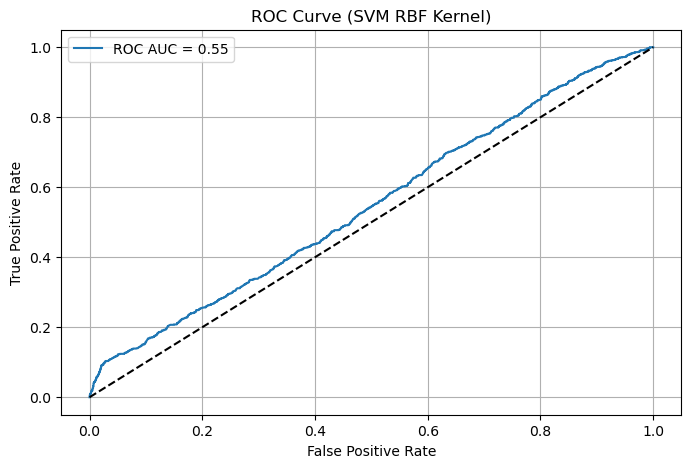

In [ ]:
# Improved SVM model with grid search

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

# Scale features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for RBF SVM
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1]
}

# Lean grid search (3-fold, no probability calibration)
start_time = time.time()
grid_search = GridSearchCV(
    SVC(kernel='rbf', probability=True),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)
train_time = time.time() - start_time

# Best model and evaluation
best_svm = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

train_acc = accuracy_score(y_train, best_svm.predict(X_train_scaled))
test_acc = accuracy_score(y_test, best_svm.predict(X_test_scaled))
print(f"Train Time: {train_time:.4f} seconds")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Predict probabilities for ROC and Lift curve
y_scores = best_svm.predict_proba(X_test_scaled)[:, 1]

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_test, y_scores):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM RBF Kernel)')
plt.legend()
plt.grid(True)
plt.show()



The SVM model was much more expensive to train, but it still underperfomed the logistic regression and decision tree model

Taking the insights from the paper into account, include additional features -- poutcome, month, campaign and previous in the modeling. Build a simple logistical regression model and score it and plot its ROC curve, and finally print feature importance coefficients

Test Accuracy: 0.8979
Test AUC: 0.7415


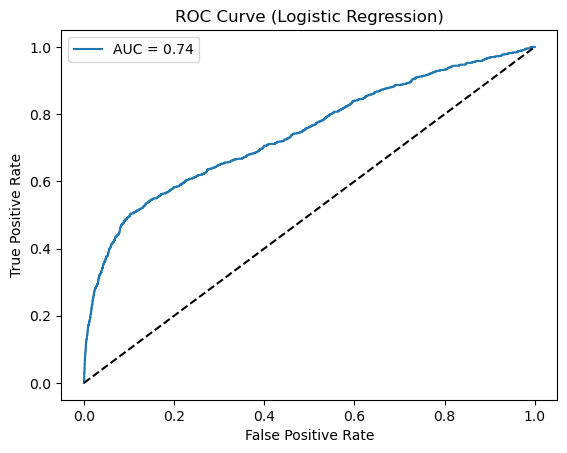

Top features driving predictions:
poutcome_success    2.038892
month_mar           1.078583
month_dec           0.770701
month_oct           0.577886
job_retired         0.573034
job_student         0.559417
month_sep           0.389808
previous            0.290526
marital_single      0.283260
marital_unknown     0.274490
dtype: float64


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Select bank client features and behavioral features
bank_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
behavioral_features = ['poutcome', 'month', 'campaign', 'previous']
target_col = 'y'

selected_features = bank_features + behavioral_features + [target_col]
df_model2 = df2[selected_features].copy()

# 2. One-hot encode categorical variables (excluding target)
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'month']
df_encoded2 = pd.get_dummies(df_model2, columns=categorical_cols, drop_first=True)

# 3. Encode target variable as binary
df_encoded2[target_col] = df_model2[target_col].map({'yes': 1, 'no': 0})

# 4. Train/test split
X2 = df_encoded2.drop(columns=[target_col])
y2 = df_encoded2[target_col]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)

# 5. Train Logistic Regression model
logreg2 = LogisticRegression(max_iter=1000)
logreg2.fit(X2_train, y2_train)

# 6. Predict and evaluate
y2_pred = logreg2.predict(X2_test)
y2_scores = logreg2.predict_proba(X2_test)[:, 1]
auc2 = roc_auc_score(y2_test, y2_scores)
print(f"Test Accuracy: {accuracy_score(y2_test, y2_pred):.4f}")
print(f"Test AUC: {auc2:.4f}")

# 7. Plot ROC curve
fpr2, tpr2, _ = roc_curve(y2_test, y2_scores)
plt.plot(fpr2, tpr2, label=f'AUC = {auc2:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend()
plt.show()

# 8. Feature importances (coefficients)
coeffs = pd.Series(logreg2.coef_[0], index=X2_train.columns).sort_values(ascending=False)
print("Top features driving predictions:")
print(coeffs.head(10))

We see that the inclusion of additional features have signficantly improved the model. The ROC curve is much improved, with an AUC of 0.74

Now trying a decision tree

Test Accuracy: 0.8992
Test AUC: 0.6342


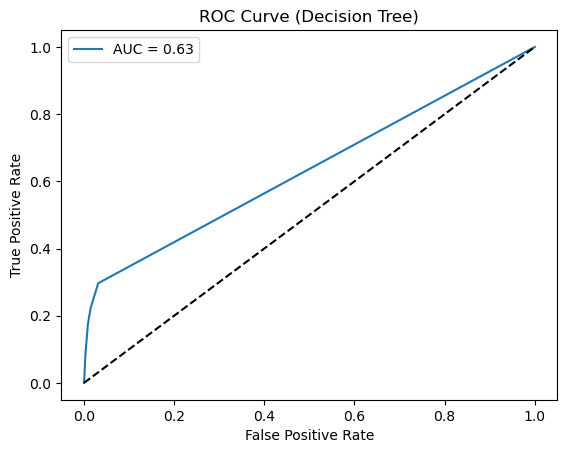

Top features driving predictions:
poutcome_success     0.722620
age                  0.148535
month_mar            0.106325
month_may            0.010609
previous             0.008689
month_sep            0.003222
campaign             0.000000
job_blue-collar      0.000000
job_entrepreneur     0.000000
job_self-employed    0.000000
dtype: float64


In [24]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Select bank client features and behavioral features
bank_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
behavioral_features = ['poutcome', 'month', 'campaign', 'previous']
target_col = 'y'

selected_features = bank_features + behavioral_features + [target_col]
df_model2 = df2[selected_features].copy()

# 2. One-hot encode categorical variables (excluding target)
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'month']
df_encoded2 = pd.get_dummies(df_model2, columns=categorical_cols, drop_first=True)

# 3. Encode target variable as binary
df_encoded2[target_col] = df_model2[target_col].map({'yes': 1, 'no': 0})

# 4. Train/test split
X2 = df_encoded2.drop(columns=[target_col])
y2 = df_encoded2[target_col]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)

# 5. Decision Tree with medium grid search (4 parameters × 2 values each = 16 combos × 2 folds = 32 fits)
param_grid = {
    'max_depth': [3, 7],           # 2 values
    'min_samples_split': [2, 10],  # 2 values
    'min_samples_leaf': [1, 4],    # 2 values
    'criterion': ['gini', 'entropy'] # 2 values
}
grid_search = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X2_train, y2_train)
best_tree = grid_search.best_estimator_

# 6. Predict and evaluate
y2_pred = best_tree.predict(X2_test)
y2_scores = best_tree.predict_proba(X2_test)[:, 1]
auc2 = roc_auc_score(y2_test, y2_scores)
print(f"Test Accuracy: {accuracy_score(y2_test, y2_pred):.4f}")
print(f"Test AUC: {auc2:.4f}")

# 7. Plot ROC curve
fpr2, tpr2, _ = roc_curve(y2_test, y2_scores)
plt.plot(fpr2, tpr2, label=f'AUC = {auc2:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree)')
plt.legend()
plt.show()

# 8. Feature importances
importances = pd.Series(best_tree.feature_importances_, index=X2_train.columns).sort_values(ascending=False)
print("Top features driving predictions:")
print(importances.head(10))


The decision tree did not yield a much better result, even with the extra features, the ROC curve while better, is only marginally improved. But the decision tree was fast to train.

Test Accuracy: 0.8918
Test AUC: 0.6952


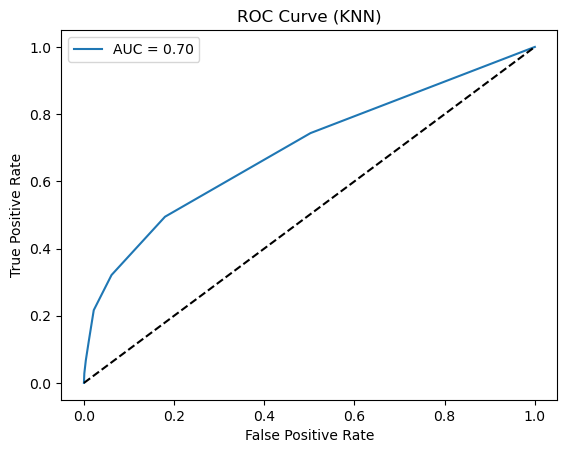

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# 1. Select bank client features and behavioral features
bank_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
behavioral_features = ['poutcome', 'month', 'campaign', 'previous']
target_col = 'y'

selected_features = bank_features + behavioral_features + [target_col]
df_model2 = df2[selected_features].copy()

# 2. One-hot encode categorical variables (excluding target)
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'month']
df_encoded2 = pd.get_dummies(df_model2, columns=categorical_cols, drop_first=True)

# 3. Encode target variable as binary
df_encoded2[target_col] = df_model2[target_col].map({'yes': 1, 'no': 0})

# 4. Train/test split
X2 = df_encoded2.drop(columns=[target_col])
y2 = df_encoded2[target_col]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)

# 5. KNN with grid search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan, 2: Euclidean
}
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X2_train, y2_train)
best_knn = grid_search.best_estimator_

# 6. Predict and evaluate
y2_pred = best_knn.predict(X2_test)
y2_scores = best_knn.predict_proba(X2_test)[:, 1]
auc2 = roc_auc_score(y2_test, y2_scores)
print(f"Test Accuracy: {accuracy_score(y2_test, y2_pred):.4f}")
print(f"Test AUC: {auc2:.4f}")

# 7. Plot ROC curve
fpr2, tpr2, _ = roc_curve(y2_test, y2_scores)
plt.plot(fpr2, tpr2, label=f'AUC = {auc2:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (KNN)')
plt.legend()
plt.show()

The KNN model provided a significantly better AUC score than the decision tree model, but its score was just slightly less than the logistic regression. However it was much more computationally expensive than logistic regression.

Next trying an SVM, with a "lean grid search" to help with compute time.

Test Accuracy: 0.8979
Test AUC: 0.6769


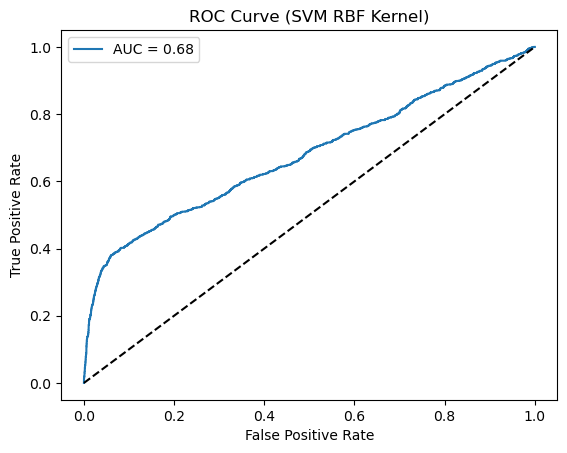

In [17]:


from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Select bank client features and behavioral features
bank_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
behavioral_features = ['poutcome', 'month', 'campaign', 'previous']
target_col = 'y'

selected_features = bank_features + behavioral_features + [target_col]
df_model2 = df2[selected_features].copy()

# 2. One-hot encode categorical variables (excluding target)
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'month']
df_encoded2 = pd.get_dummies(df_model2, columns=categorical_cols, drop_first=True)

# 3. Encode target variable as binary
df_encoded2[target_col] = df_model2[target_col].map({'yes': 1, 'no': 0})

# 4. Train/test split
X2 = df_encoded2.drop(columns=[target_col])
y2 = df_encoded2[target_col]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)

# 5. Scale features for SVM
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

# 6. SVM with lean grid search (3-fold)
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1]
}
grid_search = GridSearchCV(
    SVC(kernel='rbf', probability=True),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X2_train_scaled, y2_train)
best_svm = grid_search.best_estimator_

# 7. Predict and evaluate
y2_pred = best_svm.predict(X2_test_scaled)
y2_scores = best_svm.predict_proba(X2_test_scaled)[:, 1]
auc2 = roc_auc_score(y2_test, y2_scores)
print(f"Test Accuracy: {accuracy_score(y2_test, y2_pred):.4f}")
print(f"Test AUC: {auc2:.4f}")

# 8. Plot ROC curve
fpr2, tpr2, _ = roc_curve(y2_test, y2_scores)
plt.plot(fpr2, tpr2, label=f'AUC = {auc2:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM RBF Kernel)')
plt.legend()
plt.show()

The SVM model with the increased features, was computationally very expensive and yielded a much better model than the previous SVM model. Its scored still less than the logistic regression model with an AUC of 0.68. This could also be an artifact of the lean parameters and it is possible by choosing a set of expanded grid search parameters, we might be able to fit a much better SVM model (as the paper observes)

Finally attempting a more advanced technique -- an xgboost model after random oversampling to address class imbalance

c:\Users\murli\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:39:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test Accuracy: 0.8354
Test AUC: 0.7013


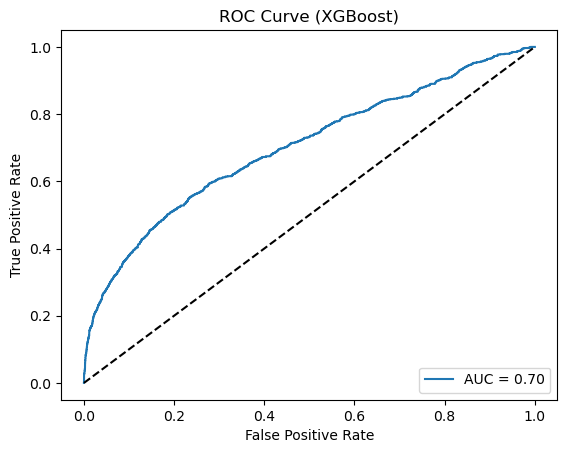

In [30]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Select bank client features and behavioral features
bank_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
behavioral_features = ['poutcome', 'month', 'campaign', 'previous']
target_col = 'y'

selected_features = bank_features + behavioral_features + [target_col]
df_model2 = df2[selected_features].copy()

# 2. One-hot encode categorical variables (excluding target)
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'month']
df_encoded2 = pd.get_dummies(df_model2, columns=categorical_cols, drop_first=True)

# 3. Encode target variable as binary
df_encoded2[target_col] = df_model2[target_col].map({'yes': 1, 'no': 0})

# 4. Train/test split
X2 = df_encoded2.drop(columns=[target_col])
y2 = df_encoded2[target_col]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)

# 5. Random oversampling on training data
ros = RandomOverSampler(random_state=42)
X2_train_res, y2_train_res = ros.fit_resample(X2_train, y2_train)

# 5. SMOTE oversampling on training data
#smote = SMOTE(random_state=42)
#X2_train_res, y2_train_res = smote.fit_resample(X2_train, y2_train)

# Calculate scale_pos_weight for XGBoost (ratio of negative to positive samples in training set)
neg, pos = np.bincount(y2_train_res)
scale_pos_weight = neg / pos

# 6. XGBoost with medium grid search (4 x 2 x 4 x 2  × 5 folds = 320 fits)
param_grid = {
    'max_depth': [3, 7, 9, 11],          # 4 values
    'n_estimators': [100, 200],          # 2 values
    'learning_rate': [0.01, 0.05, 0.1, 0.2], # 4 values
    'subsample': [0.7, 1.0],             # 2 values
    'scale_pos_weight': [scale_pos_weight]
}
grid_search = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid_search.fit(X2_train_res, y2_train_res)
best_xgb = grid_search.best_estimator_

# 7. Predict and evaluate
y2_pred = best_xgb.predict(X2_test)
y2_scores = best_xgb.predict_proba(X2_test)[:, 1]
auc2 = roc_auc_score(y2_test, y2_scores)
print(f"Test Accuracy: {accuracy_score(y2_test, y2_pred):.4f}")
print(f"Test AUC: {auc2:.4f}")

# 8. Plot ROC curve
fpr2, tpr2, _ = roc_curve(y2_test, y2_scores)
plt.plot(fpr2, tpr2, label=f'AUC = {auc2:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost)')
plt.legend(loc='lower right')
plt.show()

The xgboost method resulted in a better model, with reasonable computational efficiency. Clearly more iterations over the training, including additional features and selection of more advanced models can produce a model with a much higher AUC

##### Conclusions
We tried several modeling approaches in this excercise. One of the main challenges was in addressing class imbalance -- this occurs because most survey respondends do not respond to the marketing survey. This resulted in the initial models not doing much better, than the simple majority predictor. Grid search and hyper parameter tuning did help improve the model, but not by much. Due to the severe class imbalance problem, we had to switch to using an ROC plot as the performance metric, as it plots the true positive rate against the false positive rate, and allows identifying how good the class discrimination is, the higher the better. Including additional parameters such as previous outcome, month, campaign and previous outcome as features, produced the largest difference in modeling outcomes. Again logistic regression performed best (AUC=0.74), but KNN, SVD were not very far off. SVD in particular was very computationally expensive and had to resort to a "lean grid search" that fitted only a small number of models. Its possible that with better compute power SVD might have produced a more optimum model. Finally xgboost with random oversampling also produced good results and with more tuning might have resulted in a better model.

##### Questions